 Random Forest, Multi-Layer Perceptron, Long-Short Term Memory Neural Networks, and LASSO regression

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data and extract date time information
filepath = 'https://raw.githubusercontent.com/JadenFaste/WCECVillaraEventHistogram/main/Test%20data.csv'
df = pd.read_csv(filepath)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

hourly_data = df['VFR_HotTank_WaterDraw_FlowRate_gpm'].resample('H').mean()
hourly_data = hourly_data.reset_index()
hourly_data['hour'] = hourly_data['Date'].dt.hour
hourly_data['day_of_week'] = hourly_data['Date'].dt.dayofweek
hourly_data['day_of_month'] = hourly_data['Date'].dt.day
hourly_data['month'] = hourly_data['Date'].dt.month

# Split data into features and target
features = hourly_data[['hour', 'day_of_week', 'day_of_month', 'month']]
target = hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm']


C:\Users\bober\AppData\Local\Temp\ipykernel_10744\2986266637.py:7: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
C:\Users\bober\AppData\Local\Temp\ipykernel_10744\2986266637.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df['VFR_HotTank_WaterDraw_FlowRate_gpm'].resample('H').mean()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)


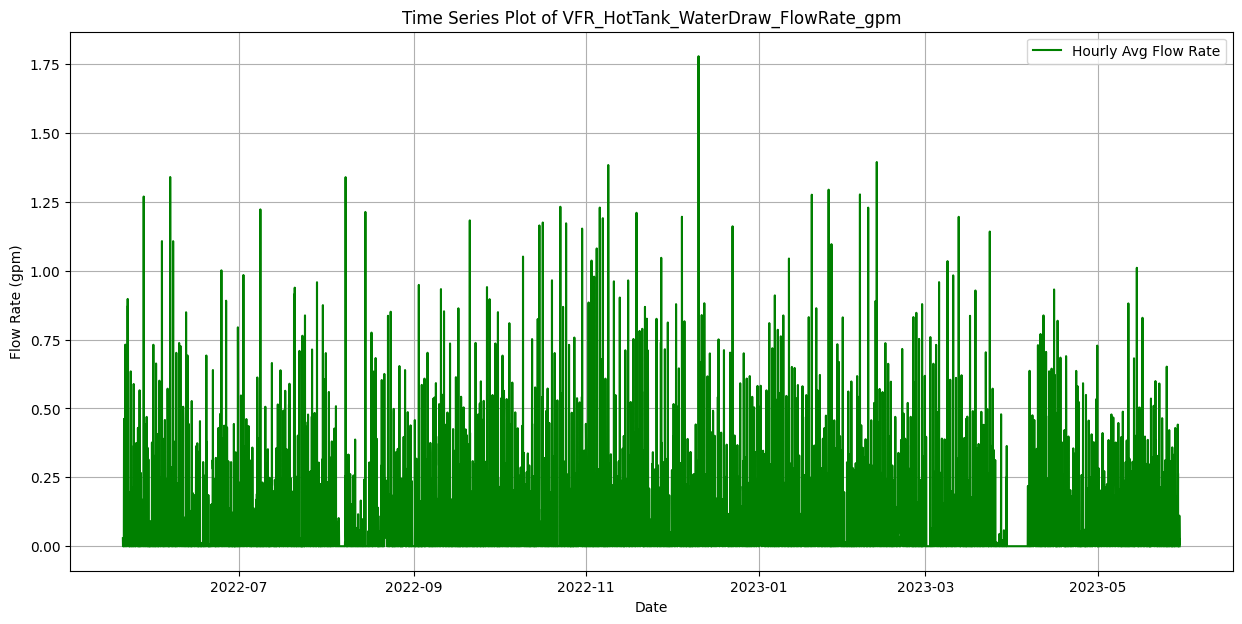

In [9]:
# Time series plot for the resampled water draw flow rate variable
plt.figure(figsize=(15, 7))
plt.plot(hourly_data['Date'], hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'], label='Hourly Avg Flow Rate', color='green')
plt.title('Time Series Plot of VFR_HotTank_WaterDraw_FlowRate_gpm')
plt.xlabel('Date')
plt.ylabel('Flow Rate (gpm)')
plt.legend()
plt.grid(True)
plt.show()


RMSE: 0.159977


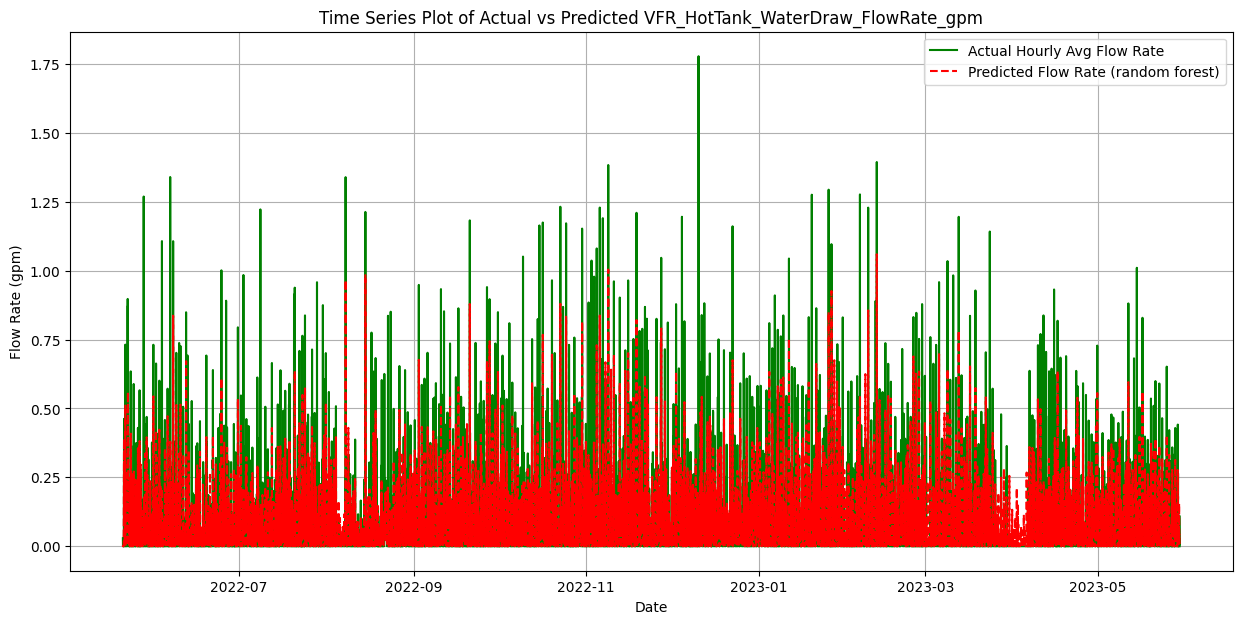

In [10]:
# Generate predictions for the entire dataset
all_features = features  # features were defined previously for the entire dataset
all_predictions = rf_regressor.predict(all_features)

# Add predictions to the hourly data DataFrame for plotting
hourly_data['Predicted_FlowRate_gpm'] = all_predictions

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

# Time series plot for actual vs predicted flow rates
plt.figure(figsize=(15, 7))
plt.plot(hourly_data['Date'], hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'], label='Actual Hourly Avg Flow Rate', color='green')
plt.plot(hourly_data['Date'], hourly_data['Predicted_FlowRate_gpm'], label='Predicted Flow Rate (random forest)', linestyle='--', color='red')
plt.title('Time Series Plot of Actual vs Predicted VFR_HotTank_WaterDraw_FlowRate_gpm')
plt.xlabel('Date')
plt.ylabel('Flow Rate (gpm)')
plt.legend()
plt.grid(True)
plt.show()


RMSE: 0.169178


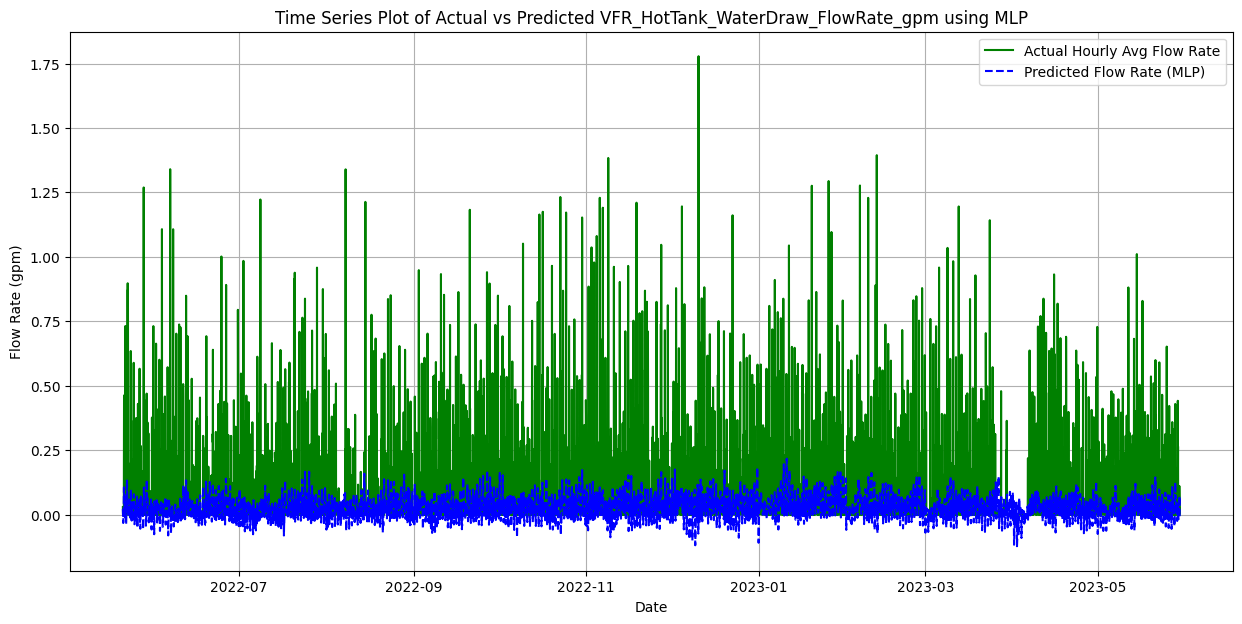

In [11]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
                             learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                             random_state=42, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                             nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                             beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# Train the MLP regressor
mlp_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_regressor.predict(X_test)

# Add MLP predictions to the hourly data DataFrame for plotting
hourly_data['MLP_Predicted_FlowRate_gpm'] = mlp_regressor.predict(features)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print("RMSE: %f" % (rmse))

# Time series plot for actual vs predicted flow rates using MLP
plt.figure(figsize=(15, 7))
plt.plot(hourly_data['Date'], hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'], label='Actual Hourly Avg Flow Rate', color='green')
plt.plot(hourly_data['Date'], hourly_data['MLP_Predicted_FlowRate_gpm'], label='Predicted Flow Rate (MLP)', linestyle='--', color='blue')
plt.title('Time Series Plot of Actual vs Predicted VFR_HotTank_WaterDraw_FlowRate_gpm using MLP')
plt.xlabel('Date')
plt.ylabel('Flow Rate (gpm)')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error for LASSO: 0.026320101331058193
RMSE: 0.162235


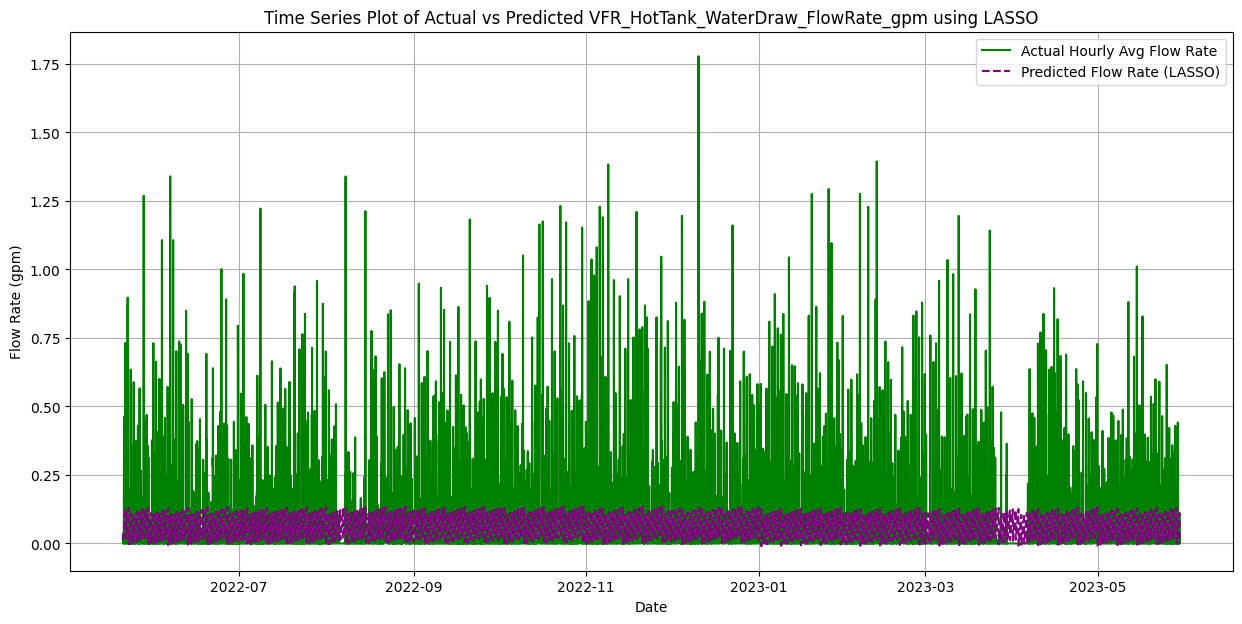

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha_values = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Perform grid search to find the optimal alpha value
lasso_regressor = Lasso(random_state=42)
grid = GridSearchCV(lasso_regressor, alpha_values, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train_scaled, y_train)

# Use the best estimator to make predictions
lasso_regressor = grid.best_estimator_
y_pred_lasso = lasso_regressor.predict(X_test_scaled)

# Calculate the mean squared error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error for LASSO: {mse_lasso}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("RMSE: %f" % (rmse))

# Add LASSO predictions to the hourly data DataFrame for plotting
hourly_data['LASSO_Predicted_FlowRate_gpm'] = lasso_regressor.predict(scaler.transform(features))

# Time series plot for actual vs predicted flow rates using LASSO
plt.figure(figsize=(15, 7))
plt.plot(hourly_data['Date'], hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'], label='Actual Hourly Avg Flow Rate', color='green')
plt.plot(hourly_data['Date'], hourly_data['LASSO_Predicted_FlowRate_gpm'], label='Predicted Flow Rate (LASSO)', linestyle='--', color='purple')
plt.title('Time Series Plot of Actual vs Predicted VFR_HotTank_WaterDraw_FlowRate_gpm using LASSO')
plt.xlabel('Date')
plt.ylabel('Flow Rate (gpm)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\bober\AppData\Local\Temp\ipykernel_2428\87913739.py:8: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\bober\AppData\Local\Temp\ipykernel_2428\87913739.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  flow_rate_hourly = flow_rate.resample('H').mean()
C:\Users\bober\AppData\Local\Temp\ipykernel_2428\87913739.py:25: FutureWarning: The provided callable <function mean at 0x000001BD63837920> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = flow_rate_hourly.pivot_table(values='VFR_HotTank_WaterDraw_FlowRate_gpm',


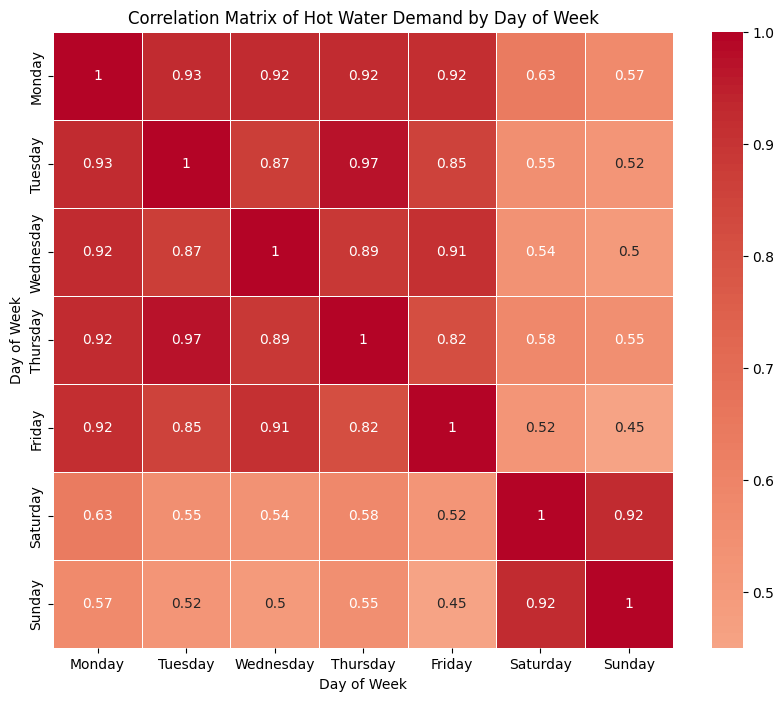

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'Test data.csv'
data = pd.read_csv(file_path)

# Extract the relevant column and convert the timestamp to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract the relevant column
flow_rate = data['VFR_HotTank_WaterDraw_FlowRate_gpm']

# Create time features
flow_rate_hourly = flow_rate.resample('H').mean()
flow_rate_hourly = flow_rate_hourly.dropna()
flow_rate_hourly = flow_rate_hourly.to_frame().reset_index()
flow_rate_hourly['DayOfWeek'] = flow_rate_hourly['Date'].dt.day_name()  # Change this line
flow_rate_hourly['Hour'] = flow_rate_hourly['Date'].dt.hour

# Pivot the data to get the average flow rate for each hour of each day
pivot_table = flow_rate_hourly.pivot_table(values='VFR_HotTank_WaterDraw_FlowRate_gpm',
                                           index='Hour', columns='DayOfWeek', aggfunc=np.mean)

# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table[days_order]

# Calculate the correlation matrix
correlation_matrix = pivot_table.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Correlation Matrix of Hot Water Demand by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Day of Week')
plt.show()

In [2]:
import pandas as pd
import numpy as np
import holidays

filepath = 'https://raw.githubusercontent.com/JadenFaste/WCECVillaraEventHistogram/main/Test%20data.csv'
data = pd.read_csv(filepath)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

hourly_data = data['VFR_HotTank_WaterDraw_FlowRate_gpm'].resample('H').sum()

# Volume for the last hour, 2 hours, 12 hours, 1 day, and 1 week
hourly_data = pd.DataFrame(hourly_data)
hourly_data['DHW1h'] = hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'].shift(1)
hourly_data['DHW2h'] = hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'].shift(2)
hourly_data['DHW12h'] = hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'].shift(12)
hourly_data['DHW1D'] = hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'].shift(24)
hourly_data['DHW1W'] = hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'].shift(168)

# Proportional features where the current value is divided by the sum of the previous day or week
hourly_data['Proportional_DHW1D'] = hourly_data['DHW1D'] / hourly_data['DHW1D'].resample('D').transform('sum').shift(1)
hourly_data['Proportional_DHW1W'] = hourly_data['DHW1W'] / hourly_data['DHW1W'].resample('W').transform('sum').shift(1)

# Binary features indicating whether there was any hot water draw in the last 12 hours or 24 hours
hourly_data['Binary_DHW12h'] = hourly_data['DHW12h'].apply(lambda x: 1 if x > 0 else 0)
hourly_data['Binary_DHW24h'] = hourly_data['DHW1D'].apply(lambda x: 1 if x > 0 else 0)

# exponential moving average and EMA considering daily patterns
hourly_data['Hourly_EMA'] = hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'].ewm(span=30).mean()
hourly_data['Daily_Hourly_EMA'] = hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'].ewm(span=4).mean()

# Indicates weekday and workdays
hourly_data['Weekday'] = hourly_data.index.weekday
hourly_data['Workday'] = hourly_data['Weekday'].apply(lambda x: 1 if x < 5 else 0)

country = 'US'  # Change this to the relevant country code
start_year = data.index.year.min()
end_year = data.index.year.max()
holiday_list = holidays.CountryHoliday(country, years=range(start_year, end_year + 1))
hourly_data['Holiday'] = data.index.to_series().apply(lambda x: 1 if x in holiday_list else 0)

# Display dataframe, first 50 rows
hourly_data.head()


C:\Users\bober\AppData\Local\Temp\ipykernel_10744\167205991.py:6: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath)
C:\Users\bober\AppData\Local\Temp\ipykernel_10744\167205991.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data['VFR_HotTank_WaterDraw_FlowRate_gpm'].resample('H').sum()


,VFR_HotTank_WaterDraw_FlowRate_gpm,DHW1h,DHW2h,DHW12h,DHW1D,DHW1W,Proportional_DHW1D,Proportional_DHW1W,Binary_DHW12h,Binary_DHW24h,Hourly_EMA,Daily_Hourly_EMA,Weekday,Workday,Holiday
Date,,,,,,,,,,,,,,,
2022-05-21 00:00:00,0.344467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.344467,0.344467,5,0,0
2022-05-21 01:00:00,0.017767,0.344467,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.175672,0.140279,5,0,0
2022-05-21 02:00:00,0.000000,0.017767,0.344467,NaN,NaN,NaN,NaN,NaN,0,0,0.113169,0.068708,5,0,0
2022-05-21 03:00:00,0.000000,0.000000,0.017767,NaN,NaN,NaN,NaN,NaN,0,0,0.081987,0.037133,5,0,0
2022-05-21 04:00:00,0.022733,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0,0,0.068505,0.030887,5,0,0


Mean Squared Error: 0.1572150081821576


<Figure size 1000x800 with 0 Axes>

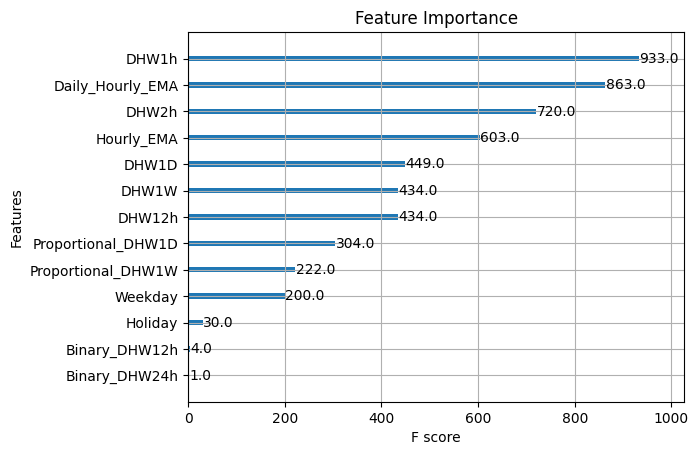

<Figure size 2000x2000 with 0 Axes>

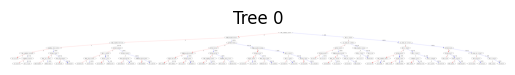

In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import holidays

hourly_data.dropna(inplace=True)

# Define the target and features
X = hourly_data.drop(columns=['VFR_HotTank_WaterDraw_FlowRate_gpm'])
y = hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Plot the first tree in the model
plt.figure(figsize=(20, 20))
xgb.plot_tree(model, num_trees=0)
plt.title('Tree 0')
plt.show()

RMSE: 1.676976


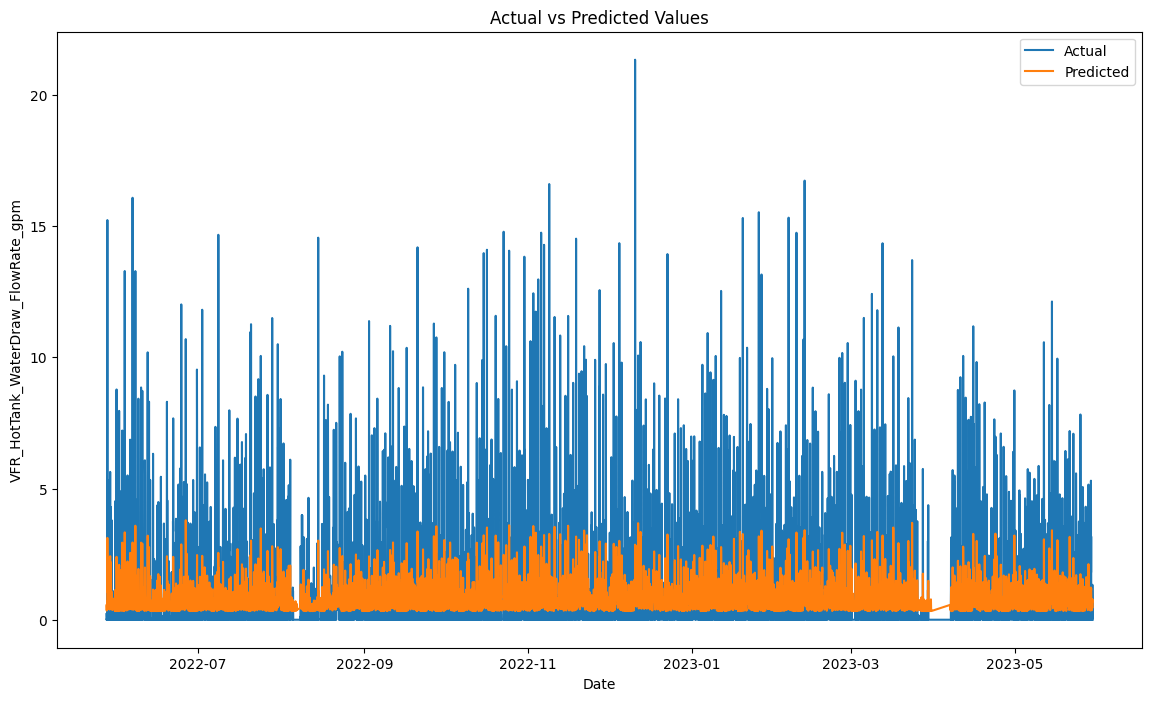

In [5]:
import matplotlib.pyplot as plt

# Drop rows with missing values

hourly_data = hourly_data.dropna()

# Define the features and the target
X = hourly_data.drop('VFR_HotTank_WaterDraw_FlowRate_gpm', axis=1)
y = hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor model
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Train the model
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

y_pred_all = model.predict(X)

# Create a DataFrame with the actual and predicted values
results = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred_all
})

# Reset the index of the results DataFrame to the original datetime index of hourly_data
results.index = hourly_data.index

# Plot the actual and predicted values
plt.figure(figsize=(14, 8))
plt.plot(results['Actual'], label='Actual')
plt.plot(results['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('VFR_HotTank_WaterDraw_FlowRate_gpm')
plt.legend()
plt.show()